## Analisis de data multivariada - NHANES caso de estudio

En este notebook vamos a ilustrar varias tecnicas basicas para explorar data usando metodos para entender relaciones multivariables. Los metodos estadisticos utilizados aqui van en paralelo con lo que vimos en la presentacion anterior y construyen sobre el analisis univariado que vimos antes. Al igual que en el notebook para el analisis univariado, usamos la data del 2015-2016 del estudio [NHANES](https://www.cdc.gov/nchs/nhanes/index.htm) 

Muchos de los analisis presentados en este notebook usan Matplotlib y Seaborn para visualizar data. Estas son herramientas muy poderosas que nos dan una gran cantidad de opciones para desarrollar plots. No vamos a ver todas las opciones para cada funcion en los ejemplos que siguen. Pueden usar la documentacion [Matplotlib](https://matplotlib.org/users/index.html) y [Seaborn](https://seaborn.pydata.org/tutorial.html) para entender por completo las opciones, y pueden experimentar con estas y otros plots por su cuenta para darse una mejor idea de lo que se puede hacer.

Empezamos con los imports de librerias:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Luego cargamos la data de NHANES, igual que para el analisis univariado.

In [3]:
da = pd.read_csv("../data/nhanes_2015_2016.csv")

### Data cuantitativa bivariada

La data bivariada surge cuando cada "unidad de analisis" (e.i. una persona en el dataset de NHANES) es evaluada con respecto a dos rasgos (los sujetos fueron evaluados por mas de dos rasgos, pero solo vamos a considerar dos a la vez aqui)

Un scatterplot es una visualizacion cuantitativa bivariada muy comun y facil de entender. Abajo vamos a hacer un scatterplot de la longitud del brazo contra la longitud de pierna. Esto significa que la longitud de brazo ([BMXARML](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXARML)) es graficada en el eje vertical y la longitud de pierna ([BMXLEG](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXLEG)) en el eje hoizontal. Vemos una dependencia positiva entre las dos medidas -- personas con brazos mas largos tienden a tener piernas mas largas y vice-versa. Sin embargo, esta lejos de ser una relacion perfecta.

En un scatterplot con mas de ~100 puntos, "overplotting" se vuelve un problema. Esto quiere decir que muchos puntos caen encima de otros en el plot, lo que obscurece la relacion en el medio de la distribucion y sobre enfatiza los extremos. Una forma de mitigar el overplotting es usando un canal "alpha" para hacer los puntos semi transparentes, como hacemos abajo.

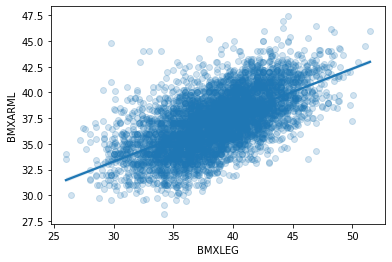

In [4]:
sns.regplot(x="BMXLEG", y="BMXARML", data=da, fit_reg=True, scatter_kws={"alpha": 0.2})

Otra forma de evitar el overplotting es haciendo un plot de la "densidad" de puntos. En los plots abajo, colores mas obscuros indican donde caen un mayor numero de puntos. Los dos margenes del plot demuestran las densidades para las dos variables por separado, mientras que el plot en el centro demuestra la densidad conjunta.

Este plot tambien demuestra el coeficiente de correlacion de Pearson entre longitud de brazo y longitud de pierna, que es 0.62. El coeficiente de correlacion de Pearson va de -1 a 1, con valores cercanos a 1 indicando una dependencia positiva mas fuerte. En muchos escenarios, una correlacion de 0.62 seria considerada una dependencia positiva moderadamente fuerte.

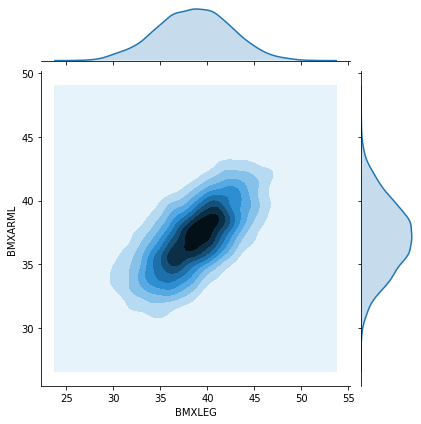

In [5]:
sns.jointplot(x="BMXLEG", y="BMXARML", kind='kde', data=da)

Otro ejemplo con un comportamiento un poco diferente:

Podemos ver que la presion sistolica y diastolica (esencialmente la presion sanguinea maxima y minima entre dos latidos de corazon consecutivos) tienen una correlacion mas debil que la de la longitud de brazo y pierna, con un coeficiente de correlacion de 0.32. Esta correlacion mas debil indica que algunas personas tienen una presion sistolica inusualmente alta pero tienen presion diastolica promedio y viceversa.

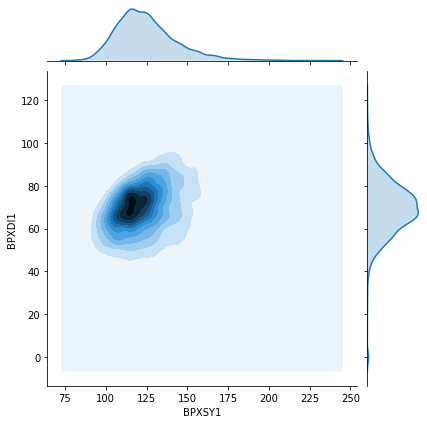

In [6]:
sns.jointplot(x="BPXSY1", y="BPXDI1", kind='kde', data=da)

Luego vemos dos medidas repetidas de presion sistolica, tomadas un par de minutes aparte en la misma persona. Estos valores estan altamente correlacionados, con un coeficiente de correlacion de 0.96

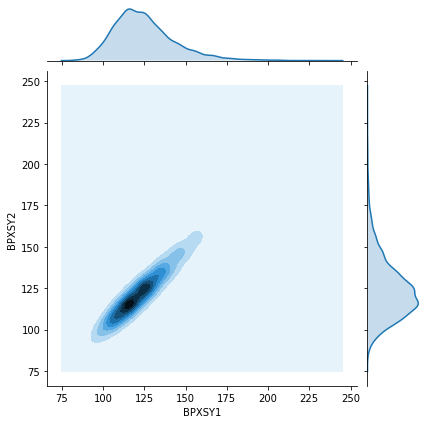

In [13]:
jp = sns.jointplot(x="BPXSY1", y="BPXSY2", kind='kde', data=da)
jp.savefig("test.png")

### Heterogeneidad y estratificacion

La mayoria de caracteristicas humanas son complejas -- varian por genero, edad, etnicidad, y otros factores. Este tipo de variacion a menudo se le refiere como "heterogeneidad". Cuando esta presente, usualmente es productivo explorar la data mas a profundidad estratificandola sobre factores relevantes, como hicimos en el analisis univariado.

Abajo continuamos estudiando la relacion entre longitud de brazo y pierna, estratificando por gener, luego por genero y etnicidad. El plot estratificado por genero indica que los hombres tienden a tener brazos y piernas mas largos que las mujeres -- esto se refleja en el hecho que las nubes de puntos a la izquierda estan corridos un poco hacia arriba y hacia la derecha relativo a la nube de puntos a la derecha. Adicionalmente, la correlacion entre longitud de brazos y piernas parece ser mas debil en mujeres que en hombres.

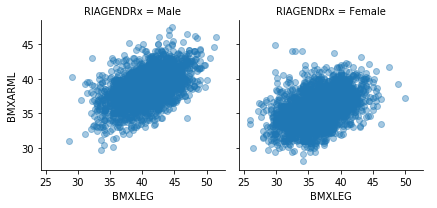

In [8]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"}) 
sns.FacetGrid(da, col="RIAGENDRx").map(plt.scatter, "BMXLEG", "BMXARML", alpha=0.4).add_legend()

Consistente con el scatterplot, se puede ver una correlacion un poco mas debil entre longitud de brazo y pierna en mujeres (comparada con hombres) calculando el coeficiente de correlacion por separado entra cada genero.

El metodo `corr` de un dataframe calcula los coeficientes de correlacion para cada par de variables en el dataframe. Este metodo retorna una matriz de correlacion, que es una tabla que contiene las correlaciones entre cada par de variables en el data set. Noten que la diagonal de la matriz de correlacion siempre contiene 1's, ya que la correlacion entre una variable con si misma siempre es 1. La matriz de correlacion tambien es simetrica al rededor de esta diagonal, ya que la correlacion entre dos variables `X` y `y` no dependen del orden en el que se consideran.

En los resultados de abajo, podemos ver la correlacion entre longitud de brazo y pierna. Es 0.50 para hombres, mientras que para las mujeres es 0.43.

In [9]:
print(da.loc[da.RIAGENDRx=="Female", ["BMXLEG", "BMXARML"]].dropna().corr())
print(da.loc[da.RIAGENDRx=="Male", ["BMXLEG", "BMXARML"]].dropna().corr())

           BMXLEG   BMXARML
BMXLEG   1.000000  0.434703
BMXARML  0.434703  1.000000
           BMXLEG   BMXARML
BMXLEG   1.000000  0.505426
BMXARML  0.505426  1.000000


Luego vemos la estratificacion para genero **Y** etnicidad. Esto resulta en 2 x 5 = 10 estratos, ya que hay dos estratos de genero y 5 de etnicidad. Estos scatterplots demuestran diferencias en medias al igual que diferencias en grado de asociacion (correlacion) entre diferentes pares de variables. Podemos ver que aunque algunos grupos etnicos tienden a tener brazos y piernas mas largos/cortos que otros, la relacion entre longitud de brazo y pierna entre generos es casi la misma a traves de grupos etnicos.

Una observacion notable es que el grupo etnico 5, que consiste de personas que reportan ser multi-raciales o son de una raza no tratada como un grupo separado (por ser una muestra muy pequenia), tiene una correlacion entre longitud de brazo y pierna mas fuerte, especialmente para hombres. Esto no es sorprendente ya que mas heterogeneidad puede permitir que surjan correlaciones que no son visibles en data homogenea.

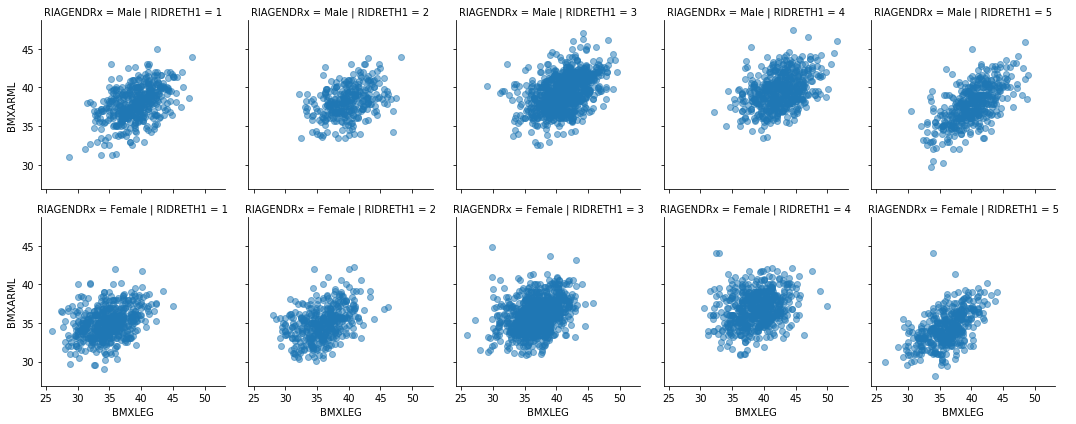

In [10]:
ax = sns.FacetGrid(da, col="RIDRETH1",  row="RIAGENDRx").map(plt.scatter, "BMXLEG", "BMXARML", alpha=0.5).add_legend()


### Data categorica bivariada

En esta seccion vamos a ver metodos para trabajar con data categorica bivariada. Podemos empezar con una tabla de contingencia, la cual cuenta el numero de personas que tiene cada combinacion de dos factores. Para ilustrar esto vamos a considerar la variable de marital status y education level.

Primero, vamos a crear nuevas versiones de estas dos variables usando nombres en vez de numeros para representar las categorias. Tambien vamos a crear un nuevo dataset que omite personas que respondieron "Don't know" o se rehusaron a responder estas preguntas.

In [6]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married",
                                      6: "Living w/partner", 77: "Refused"})
db = da.loc[(da.DMDEDUC2x != "Don't know") & (da.DMDMARTLx != "Refused"), :]

Ahora creamos la tabla de contingencia, contando el numero de personas en cada celda definida por una combinacion de education y marital status.

In [12]:
x = pd.crosstab(db.DMDEDUC2x, da.DMDMARTLx)
x

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,62,80,305,117,39,40
<9,52,66,341,65,43,88
College,120,85,827,253,22,59
HS/GED,127,133,550,237,40,99
Some college/AA,217,163,757,332,42,108


Los resultados van a ser mas faciles de interpretar si normalizamos la data. Una tabla de contingencia puede ser normalizada de tres formas diferentes -- podemos hacer que las filas sumen a 1, las columnas sumen a 1, o que toda la tabla sume a 1. Abajo normalizamos a traves de las filas. Esto nos da la proporcion de personas en cada categoria de educational attainment que caen encada grupo de la variable marital status.

El estado matrimonial mas comun para personas en cada grupo educacional es "married". Sin embargo, cuantitativamente la proporcion de personas que estan casadas varia substancialmente y es notablemente mas alta para graduandos universitarios (~61%) comparada a grupos con un nivel educacional mas bajo.

La normalizacion la podemos hacer con un `apply` esto va a aplicar una funcion `lambda` a cada fila. O la podemos especificar dentro del metodo [crosstab](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html). Especificamente vean el parametro `normalize` dentro de la funcion y los valores que puede tomar para hacer la normalizacion.

In [13]:
x.apply(lambda z: z/z.sum(), axis=1)

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,0.096423,0.124417,0.474339,0.181960,0.060653,0.062208
<9,0.079389,0.100763,0.520611,0.099237,0.065649,0.134351
College,0.087848,0.062225,0.605417,0.185212,0.016105,0.043192
HS/GED,0.107083,0.112142,0.463744,0.199831,0.033727,0.083474
Some college/AA,0.134033,0.100679,0.467573,0.205065,0.025942,0.066708


Usando `apply` tambien podemos normalizar entre columnas.

In [14]:
x.apply(lambda z: z/z.sum(), axis=0)

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,0.107266,0.151803,0.109712,0.116534,0.209677,0.101523
<9,0.089965,0.125237,0.122662,0.064741,0.231183,0.223350
College,0.207612,0.161290,0.297482,0.251992,0.118280,0.149746
HS/GED,0.219723,0.252372,0.197842,0.236056,0.215054,0.251269
Some college/AA,0.375433,0.309298,0.272302,0.330677,0.225806,0.274112


Aqui podemos ver la cantidad de personas divorciadas con un poco de educacion universitaria pero que no se graduaron, mientras que la mayoria de personas casadas son graduandos universitarios.

We see here that the plurality of divorced people have some college but have not graduated from college, while the plurality of married people are college graduates.

Es totalmente posible que hayan diferencias de genero en la relacion entre nivel educacional y estado matrimonial. Por lo tanto, podemos ver la proporcion de personas en cada categoria de estado matrimonial por cada combinacion de las variables de genero y educacion. Este analisis nos muestra unas tendencias interesantes. Las mujeres tienen una mayor probabilidad de ser viudas o divorciadas que los hombres.

In [15]:
# The following line does these steps, reading the code from left to right:
# 1 Group the data by every combination of gender, education, and marital status
# 2 Count the number of people in each cell using the 'size' method
# 3 Pivot the marital status results into the columns (using unstack)
# 4 Fill any empty cells with 0
# 5 Normalize the data by row
db.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

DMDMARTLx                  Divorced  Living w/partner   Married  \
RIAGENDRx DMDEDUC2x                                               
Female    9-11             0.113402          0.123711  0.412371   
          <9               0.091691          0.091691  0.424069   
          College          0.110181          0.055788  0.577406   
          HS/GED           0.121784          0.109777  0.413379   
          Some college/AA  0.148678          0.099119  0.418502   
Male      9-11             0.082386          0.125000  0.525568   
          <9               0.065359          0.111111  0.630719   
          College          0.063174          0.069337  0.636364   
          HS/GED           0.092869          0.114428  0.512438   
          Some college/AA  0.115331          0.102672  0.530239   

DMDMARTLx                  Never married  Separated   Widowed  
RIAGENDRx DMDEDUC2x                                            
Female    9-11                  0.171821   0.075601  0.103093  
          <9                    0.108883   0.088825  0.194842  
          College               0.182706   0.016736  0.057183  
          HS/GED                0.188679   0.041166  0.125214  
          Some college/AA       0.210352   0.031938  0.091410  
Male      9-11                  0.190341   0.048295  0.028409  
          <9                    0.088235   0.039216  0.065359  
          College               0.187982   0.015408  0.027735  
          HS/GED                0.210614   0.026534  0.043118  
          Some college/AA       0.198312   0.018284  0.035162

Un factor detras del gran numero de mujeres viudas y divorciadas podria ser que las mujeres viven mas que los hombres. Para minimizar el impacto de este factor, podemos recalcular la tabla de arriba usando un par de bandas estrechas de edades. Para simplificar esto, vamos a colapsar la data de estado matrimonial para caracterizar a las personas como "married" o "unmarried". Esto nos permite enfocarnos en la taza de matrimonio, que es una variable muy estudiadad en las ciencias sociales.

Hay un par de resultados interesantes aqui. Por ejemplo, la taza de matrimonio parece caer cuando las personas con educacion universitaria se vuelven mas viejas (e.i. 71% de mujeres con educacion universitaria entre 49 y 50 estan casadas, pero solo 65% de mujeres con educacion universitaria entre 50 y 59 estan casadas, ocurre una caida mas grande en hombres).

In [16]:
dx = db.loc[(db.RIDAGEYR >= 40) & (db.RIDAGEYR < 50)]
a = dx.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

dx = db.loc[(db.RIDAGEYR >= 50) & (db.RIDAGEYR < 60)]
b = dx.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

print(a.loc[:, ["Married"]].unstack())
print("")
print(b.loc[:, ["Married"]].unstack())

DMDMARTLx   Married                                              
DMDEDUC2x      9-11        <9   College    HS/GED Some college/AA
RIAGENDRx                                                        
Female     0.581818  0.464286  0.713376  0.476744        0.509554
Male       0.574074  0.714286  0.879310  0.616279        0.625000

DMDMARTLx   Married                                              
DMDEDUC2x      9-11        <9   College    HS/GED Some college/AA
RIAGENDRx                                                        
Female     0.490566  0.511111  0.648649  0.563107        0.496403
Male       0.666667  0.622642  0.737374  0.637255        0.555556


### Mezclando data categorica y cuantitativa

Otra situacion comun en analisis de datos es cuando queremos analizar data bivariada que consiste de una variable cuantitativa y una categorica. Para ilustrar metodos que se pueden usar en este contexto, vamos a considerar la relacion entre el estado matrimonial y la edad en la data. Especificamente, vamos a considerar la distribucion de edades para personas en cada grupo de estado matrimonial. Una herramienta natural para esto es el side-by-side boxplot. Aqui vemos algo que no sorprende -- personas viudas tienden a ser mayores, y personas que nunca se han casado tienden a ser mas jovenes.

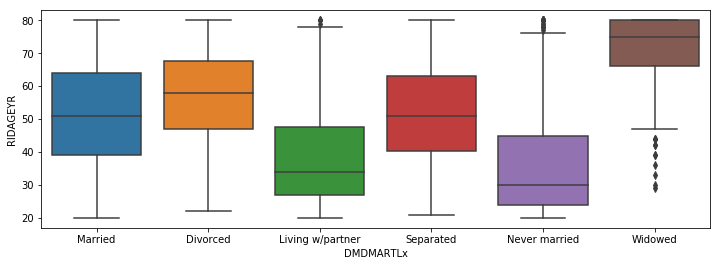

In [17]:
plt.figure(figsize=(12, 4))
a = sns.boxplot(db.DMDMARTLx, db.RIDAGEYR)

Cuando tenemos suficiente data, un "violinplot" nos da un poco mas de insight sobre la forma de la distribucion comparado a un boxplot tradicional. El violinplot de abajo esta basada en la misma data que el boxplot de arriba. Podemos ver con claridad que las distribuciones con medias bajas (living with partner, never married) tienen un sesgo fuerte hacia la derecha, mientras que la distribucion con media alta (Widowed) tiene un sesgo fuerte hacia la izquierda. 

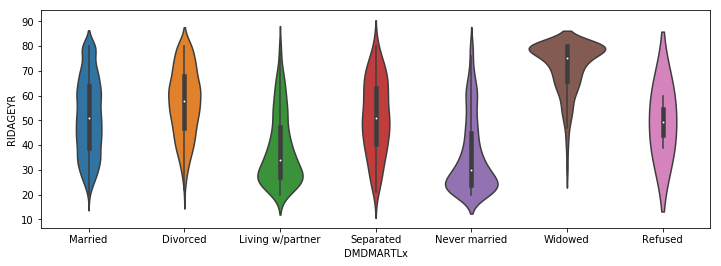

In [17]:
plt.figure(figsize=(12, 4))
a = sns.violinplot(da.DMDMARTLx, da.RIDAGEYR)

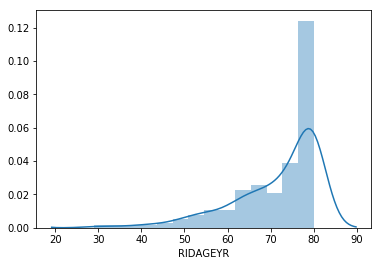

In [19]:
sns.distplot(a=da.loc[(da.DMDMARTLx == "Widowed"), "RIDAGEYR"])

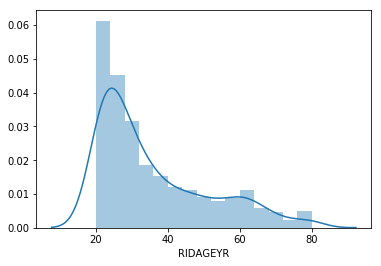

In [20]:
sns.distplot(a=da.loc[(da.DMDMARTLx == "Never married"), "RIDAGEYR"])